In [1]:
from numpy import *
import matplotlib.pyplot as plt
import matplotlib

In [2]:

# 预处理数据
def loadData(filename):
    dataSet = []
    fr = open(filename)
    for line in fr.readlines():
        curLine = line.strip().split(' ')
        fltLine = list(map(float, curLine))
        dataSet.append(fltLine)
    return dataSet

In [3]:
# 高斯分布的概率密度函数
def prob(x, mu, sigma):
    n = shape(x)[1]
    expOn = float(-0.5*(x-mu)*(sigma.I)*((x-mu).T))
    divBy = pow(2*pi, n/2)*pow(linalg.det(sigma), 0.5)
    return pow(e, expOn)/divBy

In [4]:
# EM算法
def EM(dataMat, maxIter=50):
    m, n = shape(dataMat)
    # 初始化各高斯混合成分参数
    alpha = [1/3, 1/3, 1/3]
    mu = [dataMat[0, :], dataMat[2, :], dataMat[4, :]]
    sigma = [mat([[0.1, 0], [0, 0.1]]) for x in range(3)]
    gamma = mat(zeros((m, 3)))
    print("Initialization of Alpha:\n",alpha,"\n")
    print("Initialization of mu:\n",mu,"\n")
    print("Initialization of sigma:\n",sigma,"\n")
    print("Initialization of gamma:\n",gamma,"\n")
    #for i in range(maxIter):
    
    print("Running EM Algo")
    print("Number of iterations:",maxIter,"\n")
    for i in range(maxIter):
        for j in range(m):
            sumAlphaMulP = 0
            for k in range(3):
                gamma[j, k] = alpha[k]*prob(dataMat[j, :], mu[k], sigma[k])
                sumAlphaMulP += gamma[j, k]
            for k in range(3):
                gamma[j, k] /= sumAlphaMulP
        sumGamma = sum(gamma, axis=0)
        print("Iteration {}:\n gamma:\n {}\n sumGamma:\n{}\n".format(i,gamma,sumGamma))
        for k in range(3):
            mu[k] = mat(zeros((1, n)))
            sigma[k] = mat(zeros((n, n)))
            for j in range(m):
                mu[k] += gamma[j, k]*dataMat[j, :]
            mu[k] /= sumGamma[0, k]
            for j in range(m):
                sigma[k] += gamma[j, k]*(dataMat[j, :]-mu[k]).T*(dataMat[j, :]-mu[k])
            sigma[k] /= sumGamma[0, k]
            alpha[k] = sumGamma[0, k]/m
        print("\nalpha:\n{}\n mu:\n{}\n sigma:\n{}\n".format(i,alpha,mu,sigma))
    #print(mu)
    return gamma

In [5]:
def gaussianCluster(dataMat):
    m, n = shape(dataMat)
    print("Shape of Input Data:\n",m,n,"\n")
    # 每个样本的所属的簇，以及分到该簇对应的响应度
    clusterAssign = mat(zeros((m, 2)))
    gamma = EM(dataMat,2)
    print("Returned Gamma after EM Algo:\n",gamma,"\n")
    for i in range(m):
        # amx返回矩阵最大值，argmax返回矩阵最大值所在下标
        clusterAssign[i,:] = argmax(gamma[i, :]), amax(gamma[i, :])
    print("The cluster getting from gamma:\n",clusterAssign,"\n")    
    return clusterAssign

Input data:
 [[ 0.001  0.001]
 [ 0.002 -0.002]
 [-0.001 -0.001]
 [-0.002 -0.002]
 [ 0.001 -0.001]
 [ 0.002  0.002]] 

Shape of Input Data:
 6 2 

Initialization of Alpha:
 [0.3333333333333333, 0.3333333333333333, 0.3333333333333333] 

Initialization of mu:
 [matrix([[ 0.001,  0.001]]), matrix([[-0.001, -0.001]]), matrix([[ 0.001, -0.001]])] 

Initialization of sigma:
 [matrix([[ 0.1,  0. ],
        [ 0. ,  0.1]]), matrix([[ 0.1,  0. ],
        [ 0. ,  0.1]]), matrix([[ 0.1,  0. ],
        [ 0. ,  0.1]])] 

Initialization of gamma:
 [[ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]
 [ 0.  0.  0.]] 

Running EM Algo
Number of iterations: 2 

Iteration 0:
 gamma:
 [[ 0.33334     0.33332667  0.33333333]
 [ 0.33332889  0.33332889  0.33334222]
 [ 0.33332667  0.33334     0.33333333]
 [ 0.33332     0.33334667  0.33333333]
 [ 0.33333111  0.33333111  0.33333778]
 [ 0.33334667  0.33332     0.33333333]]
 sumGamma:
[[ 1.99999333  1.99999333  2.00001333]]


alpha:
0
 mu:
[0.

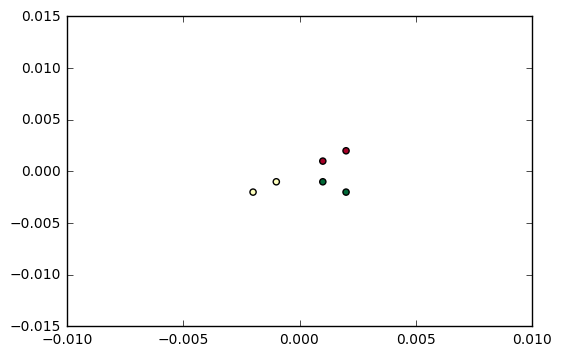

In [6]:
dataMat = mat(loadData('test1.txt'))
print("Input data:\n",dataMat,"\n")
clusterAssign = gaussianCluster(dataMat)
#print(clusterAssign)
colors = [int(x) for x in clusterAssign[:,0]]
#print(colors)
#plt.plot(dataMat[:,0],dataMat[:,1],c = norm(colors));
matplotlib.pyplot.scatter(dataMat[:,0],dataMat[:,1],c=colors, cmap='RdYlGn')
plt.show();